In [1]:
# Pandas for data loading and processing
import pandas as pd
#Data Analysis
from sklearn.linear_model import LogisticRegression
#Data splitting 
from sklearn.model_selection import train_test_split
#Numpy for diverse math functions
import numpy as np
#Model validation 
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Upsampling
from sklearn.utils import resample
#Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
#Keras Plot
from  keras.utils.vis_utils import plot_model

from numpy.random import seed
seed(1)

In [4]:
# Reading data from schwartau
schwartau_daily = pd.read_csv('schwartau_daily_filtered.csv')
wurzburg_daily = pd.read_csv('wurzburg_daily_filtered.csv')

In [5]:
#describe our data
schwartau_daily[schwartau_daily.select_dtypes(exclude='object').columns].describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,humidity,temperature,weight,flow_processed
count,876.000000,876.000000,876.000000,876.000000
mean,0.919858,0.687783,0.623752,0.414384
std,0.128482,0.285003,0.184739,0.492897
min,0.000000,0.000000,0.000000,0.000000
25%,0.891383,0.438502,0.546425,0.000000
50%,0.954106,0.731163,0.637123,0.000000
75%,0.982003,0.971083,0.738289,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [6]:
# split into test and train 
partition_schwartau=700
train_schwartau = schwartau_daily.loc[:partition_schwartau]
test_schwartau = schwartau_daily.loc[partition_schwartau:]

partition_wurzburg=500
train_wurzburg = wurzburg_daily.loc[:partition_wurzburg]
test_wurzburg = wurzburg_daily.loc[partition_wurzburg:]

In [7]:
train_schwartau.head(5)

,timestamp,humidity,temperature,weight,flow_processed
0,2017-01-01,0.990202,0.512689,0.556983,0
1,2017-01-02,0.994032,0.461218,0.556118,0
2,2017-01-03,0.992017,0.529935,0.557344,0
3,2017-01-04,0.986461,0.494228,0.554749,0
4,2017-01-05,0.982919,0.355459,0.550123,0


In [8]:
x_train = train_schwartau[:-1]
y_train = train_schwartau[1:]

x_test = test_schwartau[:-1]
y_test = test_schwartau[1:]

x_train_schwartau = x_train.drop(['flow_processed','timestamp'], axis=1)
y_train_schwartau = y_train.drop(['timestamp','humidity','temperature','weight'], axis=1)

x_test_schwartau = x_test.drop(['flow_processed','timestamp'], axis=1)
y_test_schwartau = y_test.drop(['timestamp','humidity','temperature','weight'], axis=1)

In [11]:
nn_model = Sequential()
nn_model.add(Dense(15, input_dim=3, activation='relu'))
nn_model.add(Dense(15, activation='sigmoid'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = nn_model.fit(x_train_schwartau, y_train_schwartau, epochs=10000, batch_size=300, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/10000
3/3 [==============================] - 1s 4ms/step - loss: 0.2466
Epoch 2/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2456
Epoch 3/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2451
Epoch 4/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2446
Epoch 5/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2446
Epoch 6/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2446
Epoch 7/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2444
Epoch 8/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.2442
Epoch 9/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2440
Epoch 10/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2438
Epoch 11/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2436
Epoch 12/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.2434
Epoch 13/10000
3/3 [=================

In [12]:
y_pred_test_nn = nn_model.predict(x_test_schwartau)
y_train_pred_nn = nn_model.predict(x_train_schwartau)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train_schwartau, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test_schwartau, y_pred_test_nn)))

The R2 score on the Train set is:	0.441
The R2 score on the Test set is:	0.228


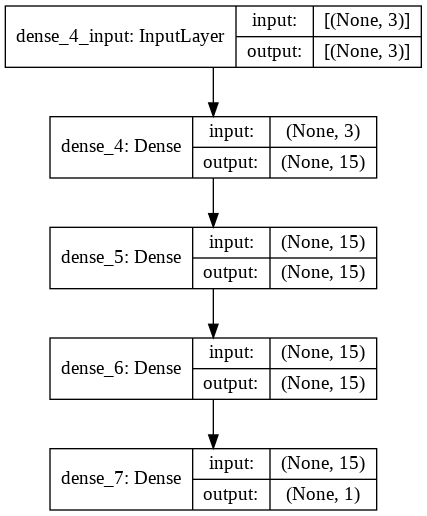

In [13]:
plot_model(nn_model, to_file="modelo.png",show_shapes=True)